In [4]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix
from dpks.differential_testing import DifferentialTest

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv",
)

In [5]:
quantified_data = (
    quant_matrix.filter().normalize(
        method="mean",
        log_transform=True,
        use_rt_sliding_window_filter=True,
        minimum_data_points=100,
        stride=5,
        use_overlapping_windows=True,
        rt_unit="minutes",
    )#.scale("minmax")
    # .quantify(method="top_n", top_n=1)
)
quantified_data.to_df()

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,AAS_P2009_167,AAS_P2009_169,AAS_P2009_176,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,NaN,19.776684,NaN,...,19.006359,NaN,19.139613,NaN,NaN,18.733272,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,NaN,18.842101,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,17.311458,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NaN,19.425962,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,NaN,NaN,NaN,...,19.051848,NaN,19.125354,NaN,NaN,NaN,19.232763,NaN,NaN,18.453699
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,20.174253,21.883809,NaN,...,21.393829,20.595564,21.534720,20.703298,21.494900,20.663234,21.280040,21.555758,20.525765,20.881614
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,NaN,NaN,NaN,...,NaN,19.795811,20.362294,19.626179,20.675964,19.629798,NaN,20.438906,19.775816,19.942766
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,NaN,NaN,NaN,...,NaN,NaN,22.114408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
compared_data = quantified_data.compare(
    method="anova",
    comparisons=(4, 6),
    min_samples_per_group=2,
    level="precursor",
    multiple_testing_correction_method="fdr_tsbh",
)

compared_data.to_df()

,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,PrecursorId,DEScore4-6,Group4Mean,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,TGTLTTSETAHNM(UniMod:35)K_3,NaN,NaN,...,19.006359,NaN,19.139613,NaN,NaN,18.733272,NaN,NaN,NaN,NaN
1,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,THNDIIHNENM(UniMod:35)R_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,DSVTYTEHAK_2,NaN,NaN,...,NaN,NaN,NaN,17.311458,NaN,NaN,NaN,NaN,NaN,NaN
3,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,IHMGNC(UniMod:4)AENTAK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NDC(UniMod:4)GDYSDER,2,0,sp|A2ARV4|LRP2_MOUSE,1895.030,0.004436,0.0,NDC(UniMod:4)GDYSDER_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,AMDFDRDVLSALAEVEQLSK,3,0,sp|P02469|LAMB1_MOUSE,7300.590,0.004138,0.0,AMDFDRDVLSALAEVEQLSK_3,NaN,NaN,...,19.051848,NaN,19.125354,NaN,NaN,NaN,19.232763,NaN,NaN,18.453699
13179,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR_3,0.057278,21.207859,...,21.393829,20.595564,21.534720,20.703298,21.494900,20.663234,21.280040,21.555758,20.525765,20.881614
13180,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,SNLVGMGVIPLEYLPGETADSLGLTGR_3,0.013155,20.093441,...,NaN,19.795811,20.362294,19.626179,20.675964,19.629798,NaN,20.438906,19.775816,19.942766
13181,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,LFSGEDVLYEGDSIVYPVFINEAAYYEK_3,NaN,NaN,...,NaN,NaN,22.114408,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Log2FoldChange4-6', ylabel='-Log10CorrectedPValue4-6'>

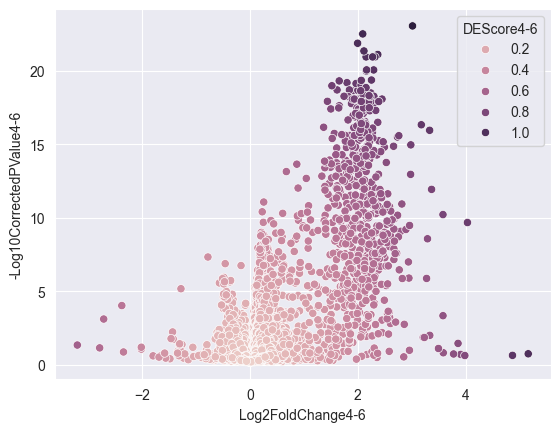

In [7]:
import seaborn as sns
import numpy as np



sns.scatterplot(
    data=compared_data.row_annotations,
    x="Log2FoldChange4-6",
    y="-Log10CorrectedPValue4-6",
    hue="DEScore4-6",
)

<Axes: >

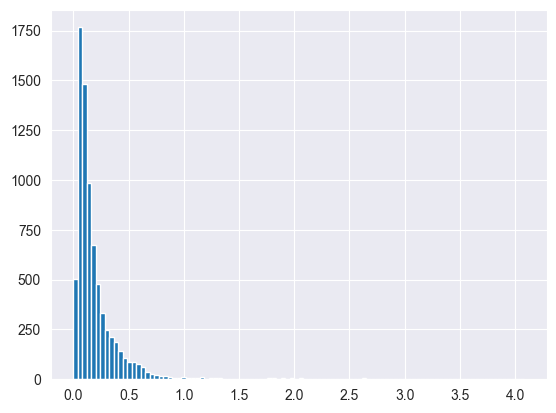

In [19]:
compared_data.row_annotations['Group6Stdev'].hist(bins=100)

In [17]:
compared_data.row_annotations['Group6Stdev'].mean(skipna=True), compared_data.row_annotations['Group6Stdev'].min(skipna=True)

(0.2049768738011806, 0.0001056881114820385)

In [20]:
compared_data.row_annotations['Group4Stdev'].mean(skipna=True), compared_data.row_annotations['Group4Stdev'].min(skipna=True)

(0.2182118240186542, 0.000477564180185297)

<Axes: >

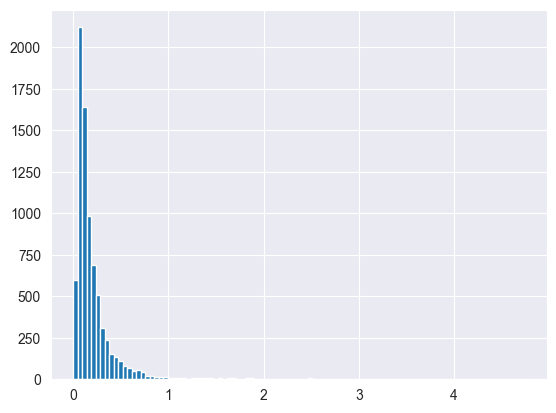

In [18]:
compared_data.row_annotations['Group4Stdev'].hist(bins=100)

<Axes: >

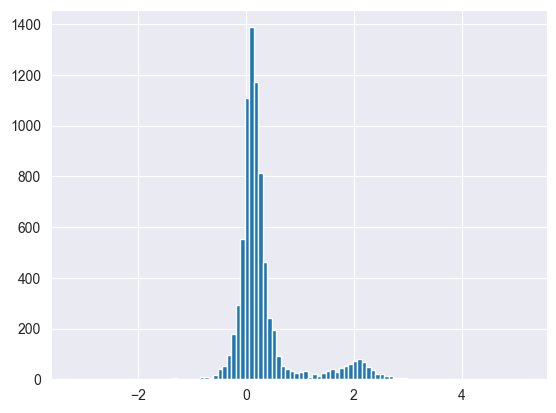

In [22]:
compared_data.row_annotations['Log2FoldChange4-6'].hist(bins=100)

In [5]:
compared_data.row_annotations["Species"] = np.where(
    compared_data.row_annotations["Protein"].str.contains("MOUSE"),
    "MOUSE",
    np.where(
        compared_data.row_annotations["Protein"].str.contains("YEAST"),
        "YEAST",
        np.where(
            compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE"
        ),
    ),
)

<Axes: xlabel='Group6Mean', ylabel='Log2FoldChange4-6'>

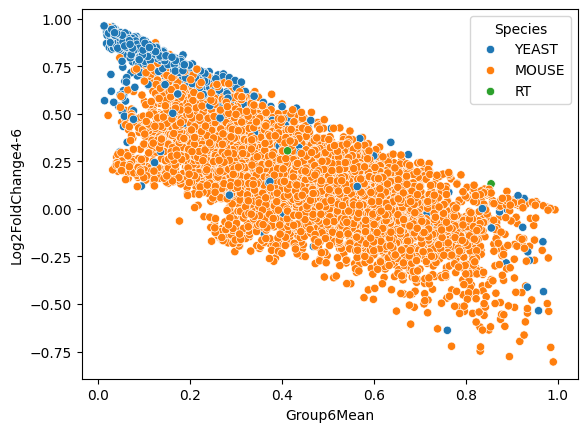

In [6]:
sns.scatterplot(
    data=compared_data.row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species",
)

In [7]:
cutoffs = np.linspace(0.0, 1.0, num=10000)

In [8]:
precision_roc_data = []

for cutoff in cutoffs[1:]:
    yeast_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    yeast_fn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    mouse_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] <= cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    mouse_tn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue4-6"] > cutoff)
        & (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    recall = yeast_ids / (yeast_ids + yeast_fn)

    precision = yeast_ids / (yeast_ids + mouse_ids)
    fpr = mouse_ids / (mouse_ids + mouse_tn)

    precision_roc_data.append({"recall": recall, "precision": precision, "fpr": fpr})

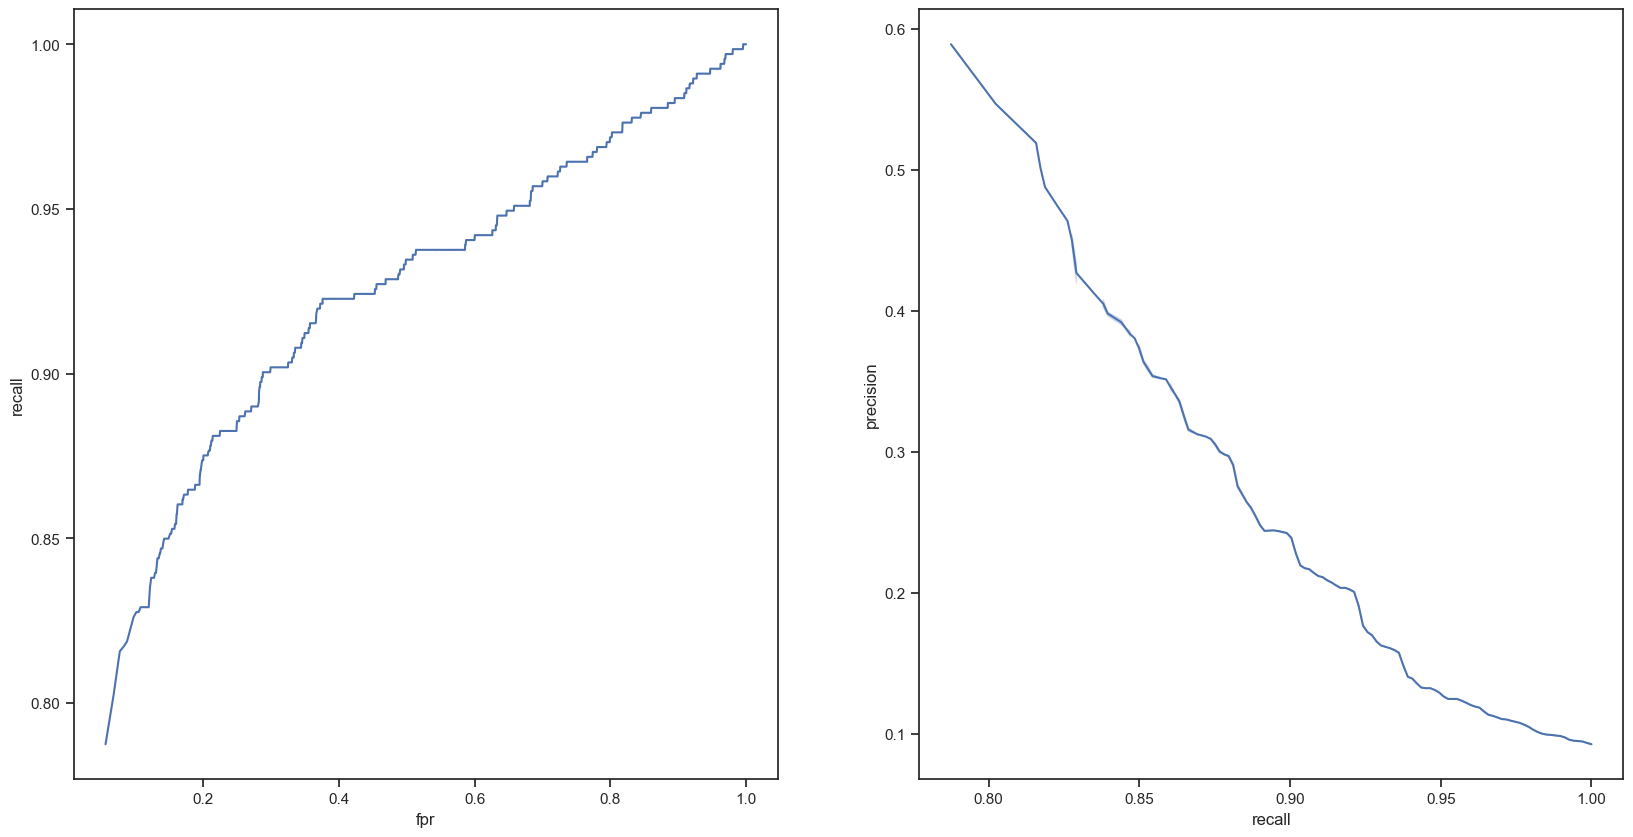

In [9]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="fpr",
    y="recall",
    ax=ax1,
)

sns.lineplot(data=pd.DataFrame(precision_roc_data), x="recall", y="precision", ax=ax2)
fig.figure.set_size_inches(20, 10)

## Paired t-test

In [10]:
import numpy as np
from scipy import stats
import pandas as pd

from dpks.quant_matrix import QuantMatrix


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs3 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs4 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

qm = pd.DataFrame(
    {"Protein": range(len(rvs1)), "s1": rvs1, "s2": rvs2, "s3": rvs3, "s4": rvs4}
)
design = pd.DataFrame(
    {
        "sample": ["s1", "s2", "s3", "s4"],
        "group": [1, 2, 2, 1],
        "pair": ["s2", "s1", "s4", "s3"],
    }
)

quant_matrix = QuantMatrix(qm, design)
compared_data = quant_matrix.compare(
    method="ttest_paired",
    comparisons=(1, 2),
    min_samples_per_group=1,
    level="Protein",
    multiple_testing_correction_method="fdr_tsbh",
)
compared_data.to_df()

,Protein,DEScore1-2,Group1Mean,Group2Mean,Group1Stdev,Group2Stdev,Log2FoldChange1-2,PValue1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue1-2,-Log10CorrectedPValue1-2,s1,s2,s3,s4
0,0,0.784913,18.274420,-3.739915,8.621903,2.757671,22.014335,0.303724,2,2,0.954631,0.020164,26.896322,-6.497586,-0.982245,9.652517
1,1,0.053036,20.050926,21.450206,1.389799,6.481908,-1.399279,0.829275,2,2,0.981295,0.008200,18.661128,14.968298,27.932114,21.440725
2,2,0.224441,5.900587,0.107659,1.973144,2.370575,5.792928,0.409597,2,2,0.954631,0.020164,7.873731,-2.262916,2.478234,3.927443
3,3,0.453525,4.847420,17.619010,9.494954,6.181084,-12.771590,0.564773,2,2,0.954631,0.020164,14.342374,11.437926,23.800094,-4.647534
4,4,0.041611,4.114168,5.283223,13.256945,0.272630,-1.169055,0.942835,2,2,0.994234,0.002511,17.371113,5.555852,5.010593,-9.142777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.094403,2.671628,5.268168,6.811842,1.115047,-2.596540,0.798480,2,2,0.981295,0.008200,-4.140215,6.383215,4.153121,9.483470
496,496,0.524288,-8.329753,6.511900,18.630584,5.991872,-14.841653,0.654664,2,2,0.981013,0.008325,-26.960337,12.503772,0.520028,10.300830
497,497,0.117145,7.250233,4.336900,4.081239,0.284040,2.913334,0.583371,2,2,0.954983,0.020004,11.331472,4.620940,4.052859,3.168995
498,498,0.247325,-1.593123,5.372061,16.563111,0.947263,-6.965184,0.732906,2,2,0.981295,0.008200,-18.156234,4.424798,6.319323,14.969988


# Covariate

In [2]:
import numpy as np
from scipy import stats
import pandas as pd

from dpks.quant_matrix import QuantMatrix


rng = np.random.default_rng()

rvs1 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng)
rvs2 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs3 = stats.norm.rvs(loc=8, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

rvs4 = stats.norm.rvs(loc=5, scale=10, size=500, random_state=rng) + stats.norm.rvs(
    scale=0.2, size=500, random_state=rng
)

qm = pd.DataFrame(
    {"Protein": range(len(rvs1)), "s1": rvs1, "s2": rvs2, "s3": rvs3, "s4": rvs4}
)
design = pd.DataFrame(
    {
        "sample": ["s1", "s2", "s3", "s4"],
        "group": [1, 2, 2, 1],
        "age": [1, 2, 3, 4],
    }
)

quant_matrix = QuantMatrix(qm, design)
compared_data = quant_matrix.compare(
    method="linregress",
    comparisons=(1, 2),
    min_samples_per_group=1,
    level="Protein",
    multiple_testing_correction_method="fdr_tsbh",
    covariates=["age"],
)
compared_data.to_df()

,Protein,DEScore1-2,Group1Mean,Group2Mean,Group1Stdev,Group2Stdev,Log2FoldChange1-2,PValue1-2,Group1RepCounts,Group2RepCounts,CorrectedPValue1-2,-Log10CorrectedPValue1-2,s1,s2,s3,s4
0,0,0.153047,0.645761,6.283843,9.745178,12.501577,-5.638083,0.728607,2,2,0.972771,0.011990,-9.099417,-6.217733,18.785420,10.390939
1,1,0.227559,3.031979,-5.099243,2.774299,8.281568,8.131222,0.561308,2,2,0.972771,0.011990,5.806278,3.182325,-13.380810,0.257681
2,2,0.375455,-2.042577,8.728507,8.350574,0.207757,-10.771084,0.197646,2,2,0.961397,0.017097,-10.393151,8.520750,8.936264,6.307997
3,3,0.733596,-11.859001,11.872927,7.649753,4.607381,-23.731928,0.073717,2,2,0.961397,0.017097,-19.508755,7.265546,16.480308,-4.209248
4,4,0.345371,-0.910347,11.569801,2.687369,6.791677,-12.480148,0.439677,2,2,0.972771,0.011990,-3.597716,18.361478,4.778124,1.777022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0.381188,-9.300669,0.637451,8.461452,4.771517,-9.938120,0.163955,2,2,0.961397,0.017097,-0.839216,5.408968,-4.134066,-17.762121
496,496,0.211685,0.760388,6.021951,0.382314,2.303291,-5.261564,0.353233,2,2,0.972771,0.011990,0.378074,8.325242,3.718660,1.142701
497,497,0.280313,1.550988,10.095011,5.983254,1.614714,-8.544023,0.328240,2,2,0.972771,0.011990,7.534242,8.480296,11.709725,-4.432266
498,498,0.294291,3.614146,13.489225,1.316004,5.532539,-9.875080,0.385395,2,2,0.972771,0.011990,2.298142,7.956686,19.021764,4.930150
